In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
# import numpy as np

Будем решать задачу поискfа коэффициентов $ w_1 $ и $ w_2 $ из уравнеения регрессии 

$$
\hat y = w_1 x_1 + w_2 x_2
$$

Функция потерь пусть будет MSE: 
$$
L = (x_1 w_1 + x_2 w_2 - y)^2
$$

Производные элементарные:

$$ 
\frac{dL}{dw_1} = 2 (x_1 w_1 + x_2 w_2 - y) x_1   и  
\frac{dL}{dw_2} = 2 (x_1 w_1 + x_2 w_2 - y) x_2
$$



<a list of 18 text.Text objects>

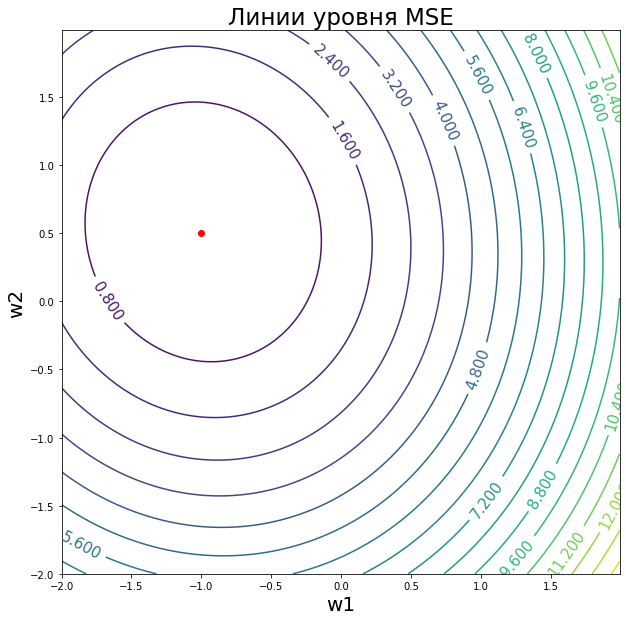

In [16]:
# генерируем простой датасет
torch.random.manual_seed(42)
N = 100
x = torch.randn(N,2)
w = torch.Tensor([[-1], [0.5]])
x[:, 0] *= 1  # оставим себе возможность растягивать датасет вдоль одной оси
y = torch.mm(x, w) + torch.randn(N, 1) * 0.2
    
# рисуем линии уровня поери в пространстве весов

fig, ax = plt.subplots(figsize=(10, 10))
W1, W2 = torch.meshgrid(torch.arange(-2, 2, 0.01), torch.arange(-2, 2, 0.01))
Z = torch.mean(((torch.mm(x,torch.stack([W1.reshape(-1), W2.reshape(-1)])) - y) **2), axis = 0).view(W1.shape)
contour = ax.contour(W1, W2, Z, 20)
ax.scatter(*w, c='red') # наши идеальные параметры
plt.xlabel('w1', fontsize =20)
plt.ylabel('w2', fontsize =20)
plt.title(u"Линии уровня MSE", fontsize=23)
ax.clabel(contour, inline=1, fontsize=15)

Здесь можно поподробнее расмотреть что такое W1 и W2 Это как бы заготовки для наших коэффициентов w1 и w2

In [ ]:
W2

In [31]:
def plot_gd(x_scale, lr, steps, optimizer=None):
    
    # генерируем простой датасет
    torch.random.manual_seed(42)
    N = 100
    x = torch.randn(N,2)
    w = torch.Tensor([[-1], [0.5]]) # Вот наши целевые значения
    x[:, 0] *= x_scale  # "растягиваем" наш датасет вдоль одного параметра
    y = torch.mm(x, w) + torch.randn(N, 1) * 0.2
    
    
    # оптимизация в PyTorch
    w_guess = torch.FloatTensor([[1.5], [-1.5]])
    w_guess.requires_grad = True 
    traectory = [[w_guess[0].item()], [w_guess[1].item()]]
    
    
    if not optimizer:
        for i in range(steps):
            y_pred = torch.mm(x,w_guess)
            loss = torch.mean((y_pred - y)**2)
            loss.backward()
            w_guess.data.add_(w_guess.grad.data.mul(-lr))
            w_guess.grad.zero_()
            traectory[0].append(w_guess[0].item())
            traectory[1].append(w_guess[1].item())
            
    elif optimizer == 'sgd':
        opt = torch.optim.SGD([w_guess], lr= lr)
        for i in range(steps):
            y_pred = torch.mm(x,w_guess)
            loss = torch.mean((y_pred - y)**2)
            loss.backward()
            opt.step()
            opt.zero_grad()
            traectory[0].append(w_guess[0].item())
            traectory[1].append(w_guess[1].item())
    elif optimizer == 'adam':
        opt = torch.optim.Adam([w_guess], lr= lr)
        for i in range(steps):
            y_pred = torch.mm(x,w_guess)
            loss = torch.mean((y_pred - y)**2)
            loss.backward()
            opt.step()
            opt.zero_grad()
            traectory[0].append(w_guess[0].item())
            traectory[1].append(w_guess[1].item())
    
            
    fig, ax = plt.subplots(figsize=(10, 10))
    W1, W2 = torch.meshgrid(torch.arange(-2, 2, 0.01), torch.arange(-2, 2, 0.01))
    Z = torch.mean(((torch.mm(x,torch.stack([W1.reshape(-1), W2.reshape(-1)])) - y) **2), axis = 0).view(W1.shape)
    contour = ax.contour(W1, W2, Z, 20)
    ax.scatter(*w, c='red') # наши идеальные параметры
    plt.xlabel('w1', fontsize =20)
    plt.ylabel('w2', fontsize =20)
    plt.title(u"Линии уровня MSE", fontsize=23)
    plt.plot(traectory[0], traectory[1])
    ax.clabel(contour, inline=1, fontsize=15)
    

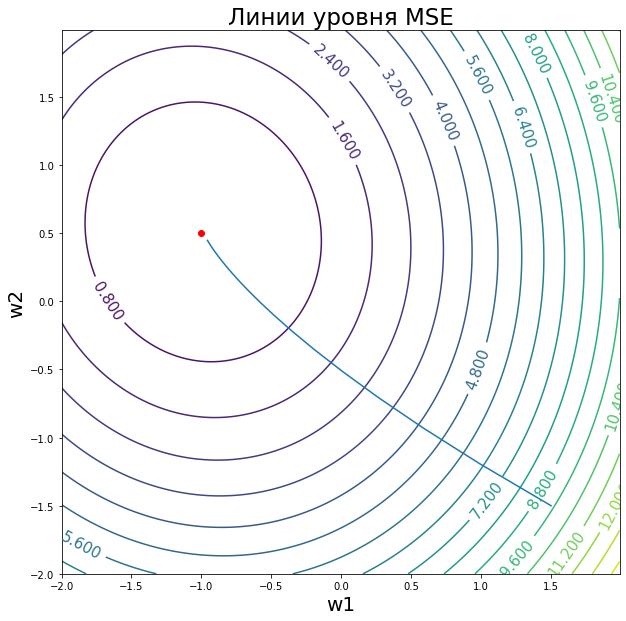

In [25]:
plot_gd(1, .1, 20)

То что мы написали и есть самый простой SGD Убедимся в этом

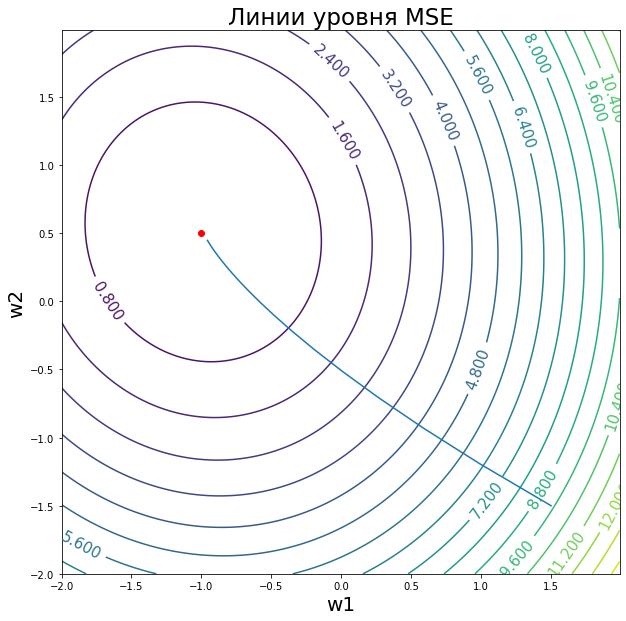

In [32]:
plot_gd(1, 0.1, 20, 'sgd')

А тепенрь попробуем изменить параметры

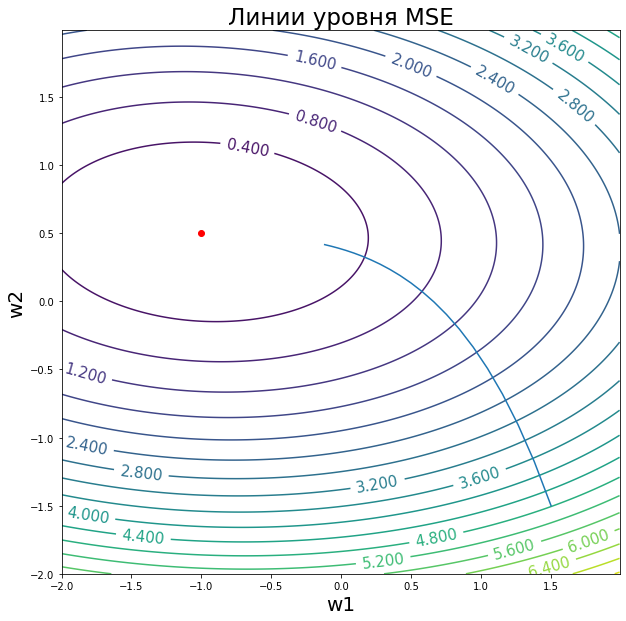

In [33]:
plot_gd(0.5, 0.1, 20, 'sgd')

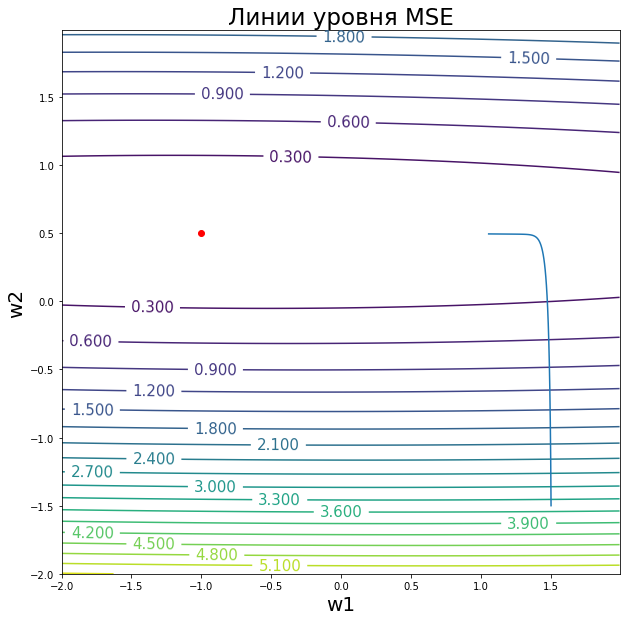

In [34]:
plot_gd(0.1, 0.1, 100, 'sgd')

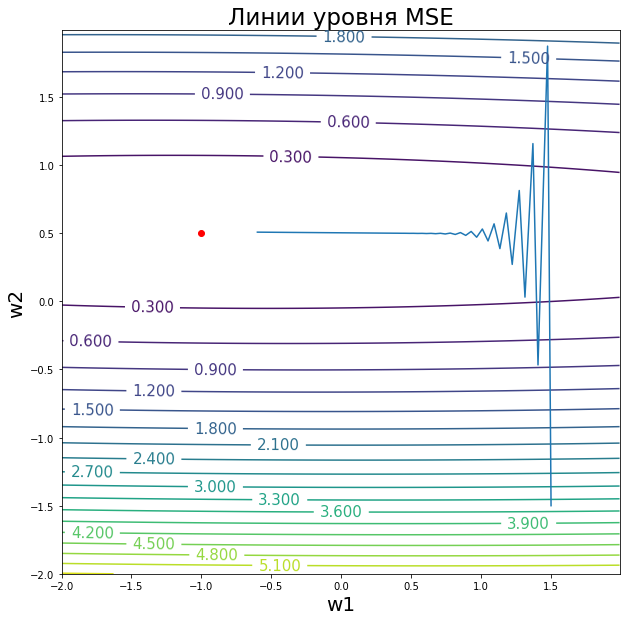

In [35]:
plot_gd(0.1, 1, 100, 'sgd')

А как покажет скбя Адам

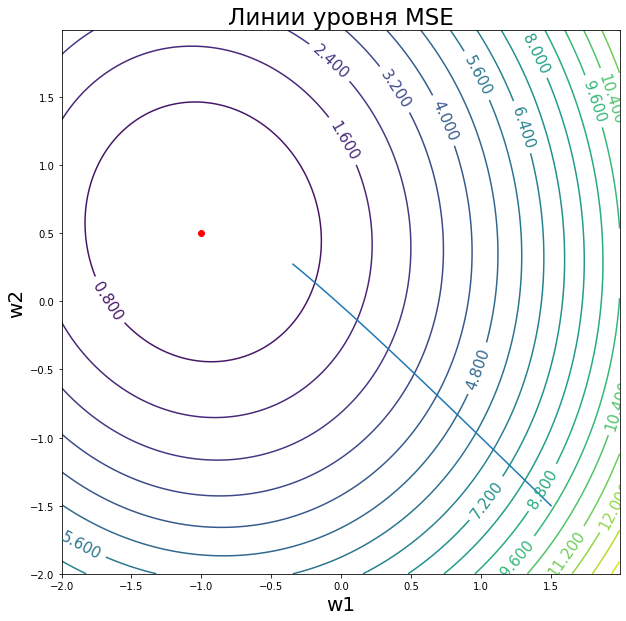

In [36]:
plot_gd(1, 0.1, 20, 'adam')

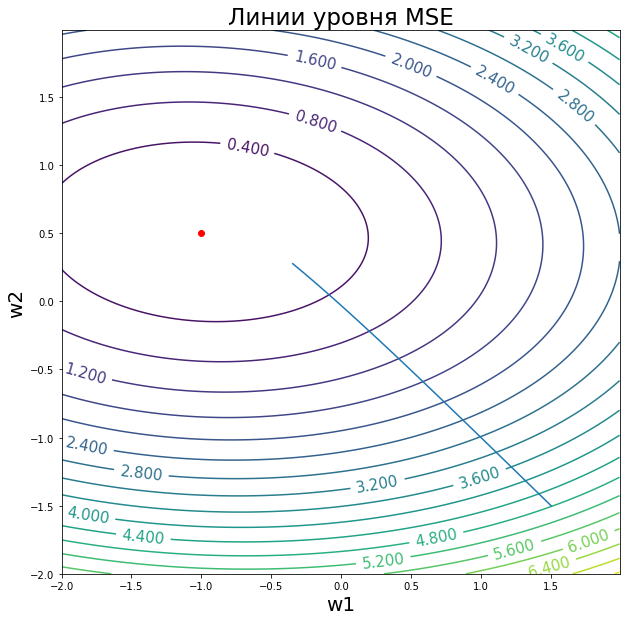

In [37]:
plot_gd(0.5, 0.1, 20, 'adam')

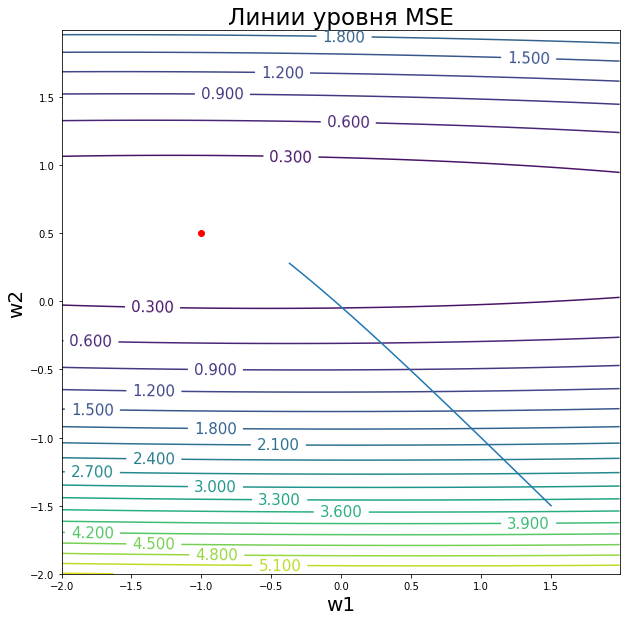

In [38]:
plot_gd(0.1, 0.1, 20, 'adam')

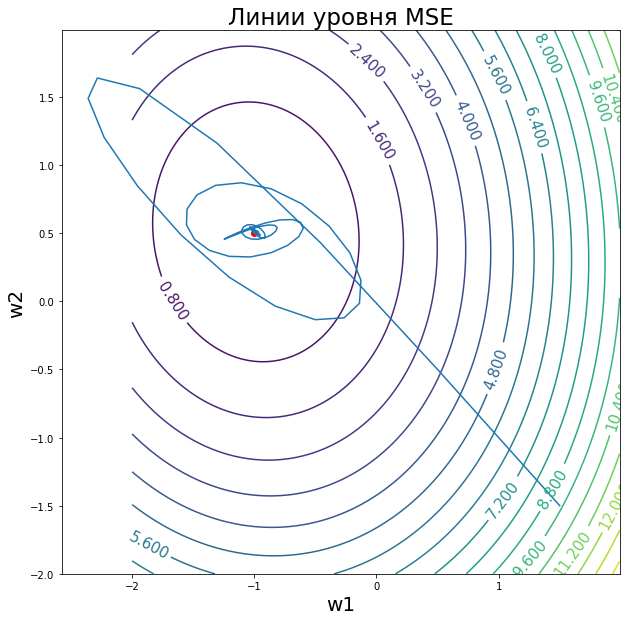

In [39]:
plot_gd(1, 1, 200, 'adam')

In [41]:
def plot_gd_comp(x_scale, lr, steps, beta=1, momentum= False, z= False):
    
    # генерируем простой датасет
    torch.random.manual_seed(42)
    N = 100
    x = torch.randn(N,2)
    w = torch.Tensor([[-1], [0.5]]) # Вот наши целевые значения
    x[:, 0] *= x_scale  # "растягиваем" наш датасет вдоль одного параметра
    y = torch.mm(x, w) + torch.randn(N, 1) * 0.2
    
    
    # оптимизация в PyTorch
    w_guess = torch.FloatTensor([[1.5], [-1.5]])
    w_guess.requires_grad = True 
    traectory = [[w_guess[0].item()], [w_guess[1].item()]]
    grad_cash = [0., 0.]
    
    
    for i in range(steps):
        y_pred = torch.mm(x,w_guess)
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        if momentum:
            w_guess.grad.data = beta * w_guess.grad.data + (1. - beta) * \
                    torch.FloatTensor([[grad_cash[-2]], [grad_cash[-1]]])
        if z:
            w_guess.grad.data = w_guess.grad.data - torch.mean(torch.Tensor(grad_cash))/ \
                    (torch.std(torch.Tensor(grad_cash)) + 0.01)

        w_guess.data.add_(w_guess.grad.data.mul(-lr))
        grad_cash.extend([w_guess.grad[0].item(), w_guess.grad[1].item()])
        w_guess.grad.zero_()
        traectory[0].append(w_guess[0].item())
        traectory[1].append(w_guess[1].item())

   
    fig, ax = plt.subplots(figsize=(10, 10))
    W1, W2 = torch.meshgrid(torch.arange(-2, 2, 0.01), torch.arange(-2, 2, 0.01))
    Z = torch.mean(((torch.mm(x,torch.stack([W1.reshape(-1), W2.reshape(-1)])) - y) **2), axis = 0).view(W1.shape)
    contour = ax.contour(W1, W2, Z, 20)
    ax.scatter(*w, c='red') # наши идеальные параметры
    plt.xlabel('w1', fontsize =20)
    plt.ylabel('w2', fontsize =20)
    plt.title(u"Линии уровня MSE", fontsize=23)
    plt.plot(traectory[0], traectory[1])
    ax.clabel(contour, inline=1, fontsize=15)

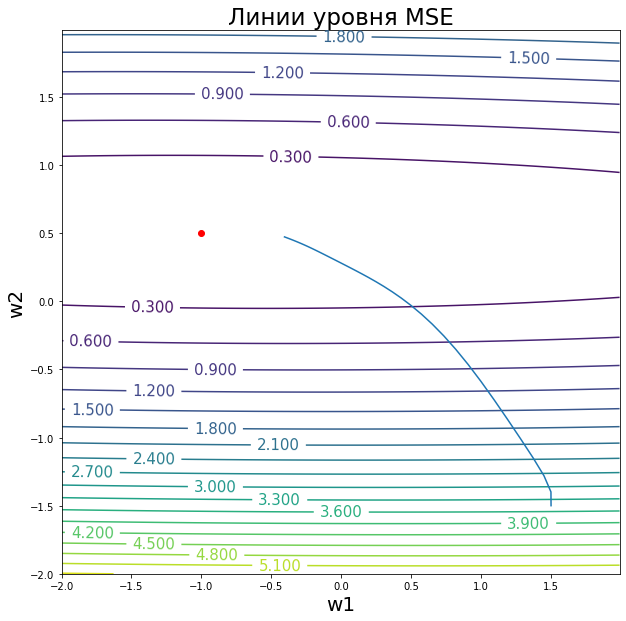

In [56]:
plot_gd_comp(x_scale=.1, lr=.1, steps=50, beta=.3, momentum= True, z= True)

In [57]:
def plot_gd_4(x_scale, lr, steps, beta=1):
    
    # генерируем простой датасет
    torch.random.manual_seed(42)
    N = 100
    x = torch.randn(N,2)
    w = torch.Tensor([[-1], [0.5]]) # Вот наши целевые значения
    x[:, 0] *= x_scale  # "растягиваем" наш датасет вдоль одного параметра
    y = torch.mm(x, w) + torch.randn(N, 1) * 0.2
    
    
    W1, W2 = torch.meshgrid(torch.arange(-2, 2, 0.01), torch.arange(-2, 2, 0.01))
    Z = torch.mean(((torch.mm(x,torch.stack([W1.reshape(-1), W2.reshape(-1)])) - y) **2), axis = 0).view(W1.shape)
    contour = ax.contour(W1, W2, Z, 20)
    
    fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(20, 20))
    
    w_guess = torch.FloatTensor([[1.5], [-1.5]])
    w_guess.requires_grad = True 
    traectory = [[w_guess[0].item()], [w_guess[1].item()]]
    grad_cash = [0., 0.]
    
    for i in range(steps):
        y_pred = torch.mm(x,w_guess)
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        w_guess.data.add_(w_guess.grad.data.mul(-lr))
        grad_cash.extend([w_guess.grad[0].item(), w_guess.grad[1].item()])
        w_guess.grad.zero_()
        traectory[0].append(w_guess[0].item())
        traectory[1].append(w_guess[1].item())
    
    axes[0][0].contour(W1, W2, Z, 20)
    axes[0][0].scatter(*w, c='red') # наши идеальные параметры
    axes[0][0].set_title(u"Простой градиент", fontsize = 25)
    axes[0][0].plot(traectory[0], traectory[1])
    axes[0][0].clabel(contour, inline=1, fontsize=15)
    

    w_guess = torch.FloatTensor([[1.5], [-1.5]])
    w_guess.requires_grad = True 
    traectory = [[w_guess[0].item()], [w_guess[1].item()]]
    grad_cash = [0., 0.]
    
    for i in range(steps):
        y_pred = torch.mm(x,w_guess)
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        w_guess.grad.data = beta * w_guess.grad.data + (1. - beta) * \
                    torch.FloatTensor([[grad_cash[-2]], [grad_cash[-1]]])
        w_guess.data.add_(w_guess.grad.data.mul(-lr))
        grad_cash.extend([w_guess.grad[0].item(), w_guess.grad[1].item()])
        w_guess.grad.zero_()
        traectory[0].append(w_guess[0].item())
        traectory[1].append(w_guess[1].item())
    
    axes[0][1].contour(W1, W2, Z, 20)
    axes[0][1].scatter(*w, c='red') # наши идеальные параметры
    axes[0][1].set_title(u"Градиент + момент", fontsize = 25)
    axes[0][1].plot(traectory[0], traectory[1])
    axes[0][1].clabel(contour, inline=1, fontsize=15)
    
    
    w_guess = torch.FloatTensor([[1.5], [-1.5]])
    w_guess.requires_grad = True 
    traectory = [[w_guess[0].item()], [w_guess[1].item()]]
    grad_cash = [0., 0.]
    
    for i in range(steps):
        y_pred = torch.mm(x,w_guess)
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        w_guess.grad.data = w_guess.grad.data - torch.mean(torch.Tensor(grad_cash)) / \
                    (torch.std(torch.Tensor(grad_cash)) + 0.01)
        w_guess.data.add_(w_guess.grad.data.mul(-lr))
        grad_cash.extend([w_guess.grad[0].item(), w_guess.grad[1].item()])
        w_guess.grad.zero_()
        traectory[0].append(w_guess[0].item())
        traectory[1].append(w_guess[1].item())
    
    axes[1][0].contour(W1, W2, Z, 20)
    axes[1][0].scatter(*w, c='red') # наши идеальные параметры
    axes[1][0].set_title(u"Градиент + нормализация", fontsize = 25)
    axes[1][0].plot(traectory[0], traectory[1])
    axes[1][0].clabel(contour, inline=1, fontsize=15)
    
    
    for i in range(steps):
        y_pred = torch.mm(x,w_guess)
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        w_guess.grad.data = beta * w_guess.grad.data + (1. - beta) * \
            torch.FloatTensor([[grad_cash[-2]], [grad_cash[-1]]])
        w_guess.grad.data = w_guess.grad.data - torch.mean(torch.Tensor(grad_cash)) / \
                    (torch.std(torch.Tensor(grad_cash)) + 0.01)
        w_guess.data.add_(w_guess.grad.data.mul(-lr))
        grad_cash.extend([w_guess.grad[0].item(), w_guess.grad[1].item()])
        w_guess.grad.zero_()
        traectory[0].append(w_guess[0].item())
        traectory[1].append(w_guess[1].item())
    
    axes[1][1].contour(W1, W2, Z, 20)
    axes[1][1].scatter(*w, c='red') # наши идеальные параметры
    axes[1][1].set_title(u"Градиент+ момент + нормализация", fontsize = 25)
    axes[1][1].plot(traectory[0], traectory[1])
    axes[1][1].clabel(contour, inline=1, fontsize=15)
    


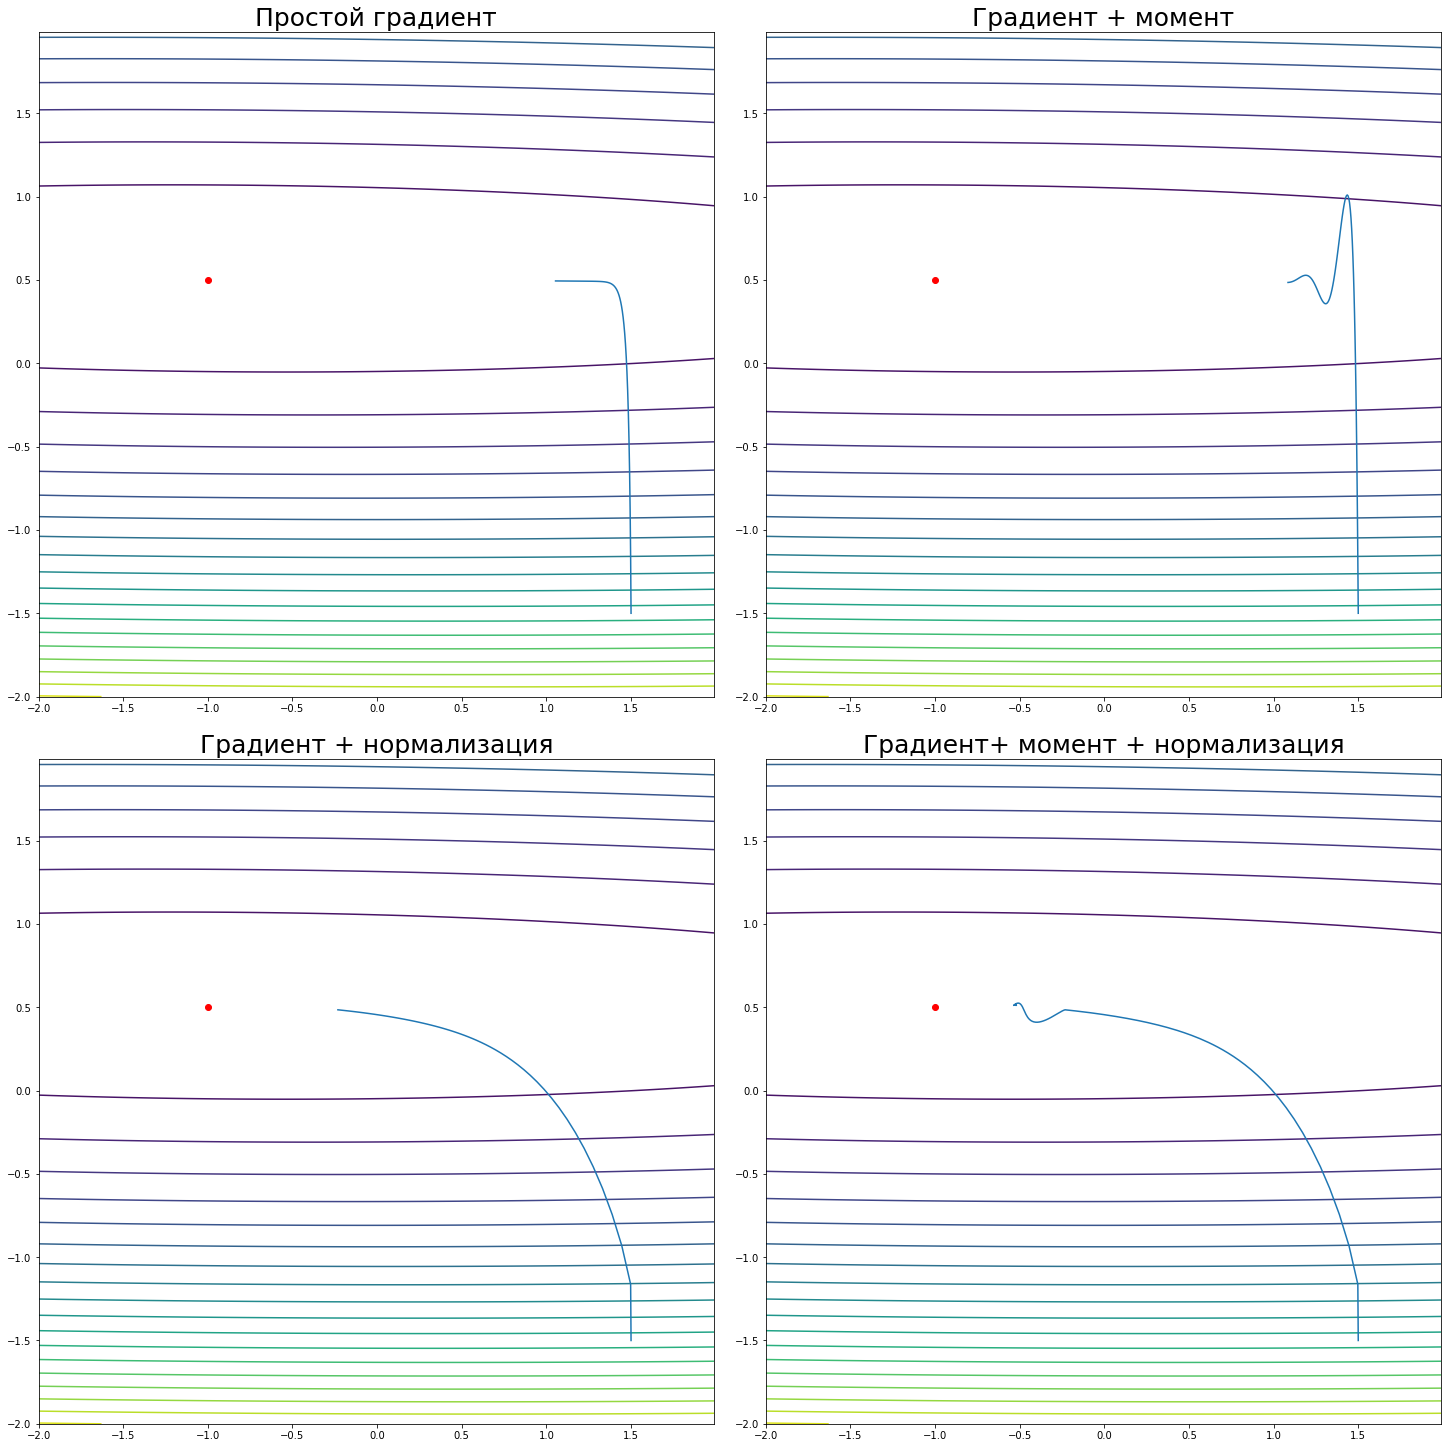

In [59]:
plot_gd_4(x_scale=.1, lr=.1, steps=100, beta=.1)